In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
purchase_behaviour_df = pd.read_csv("purchase_behaviour.csv")
transaction_data_df = pd.read_csv("transaction_data.csv")

In [5]:
# Merge datasets
merged_df = transaction_data_df.merge(purchase_behaviour_df, on="LYLTY_CARD_NBR", how="left")

In [7]:
# Ensure numeric columns are properly formatted
merged_df["TOT_SALES"] = pd.to_numeric(merged_df["TOT_SALES"], errors="coerce")

In [9]:
# Top 3 most profitable products
top_products = (
    merged_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)


In [11]:
# Most loyal customers based on transactions and spending
loyal_customers = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg({"LYLTY_CARD_NBR": "nunique", "TXN_ID": "count", "TOT_SALES": "sum"})
    .sort_values(by=["TXN_ID", "TOT_SALES"], ascending=False)
)


C:\Users\sai\AppData\Local\Temp\ipykernel_1468\1893445627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")


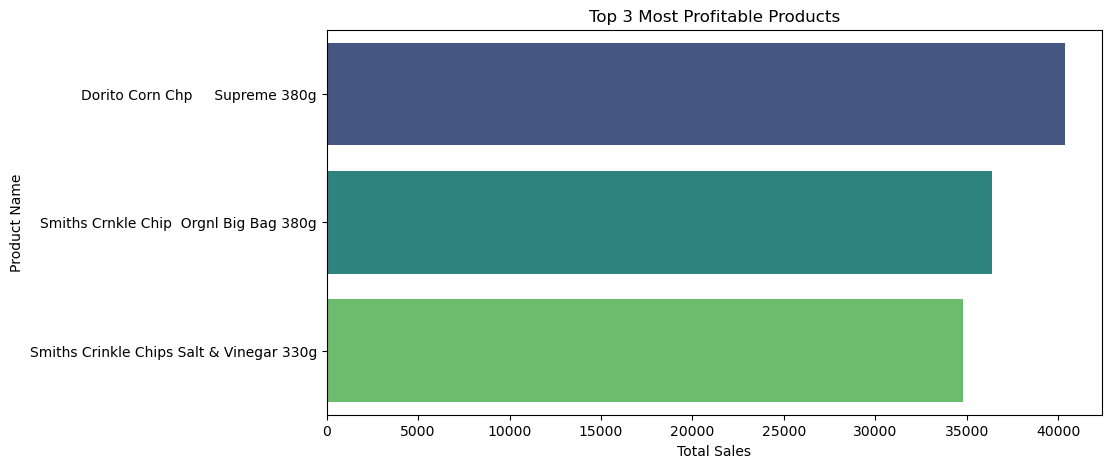

In [19]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()


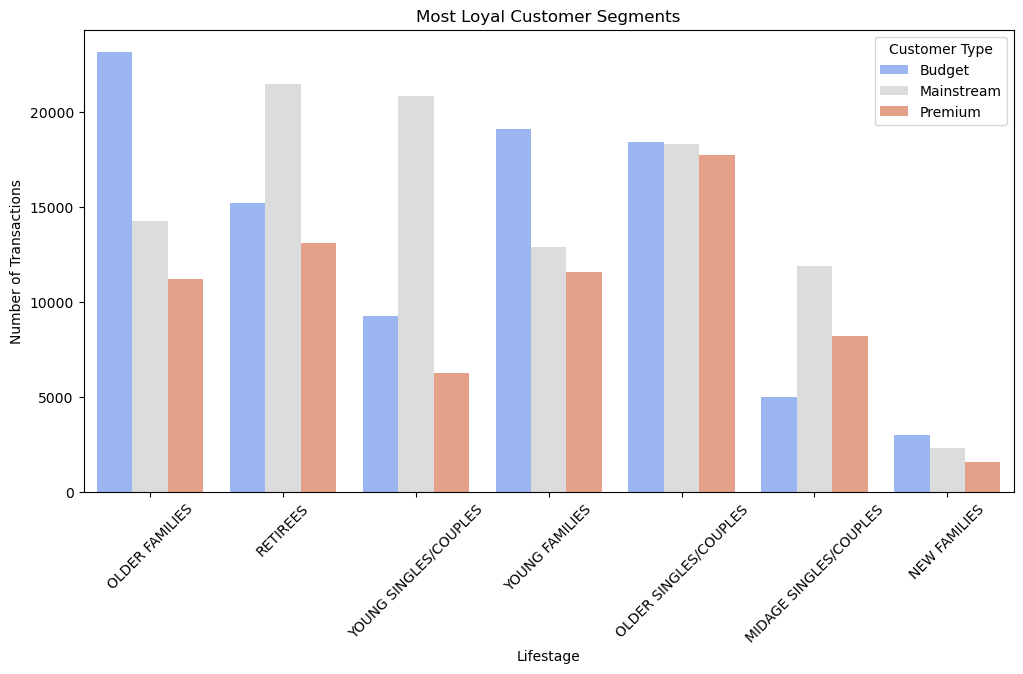

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=loyal_customers.index.get_level_values(0), y=loyal_customers["TXN_ID"], hue=loyal_customers.index.get_level_values(1), palette="coolwarm")
plt.xlabel("Lifestage")
plt.ylabel("Number of Transactions")
plt.title("Most Loyal Customer Segments")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.show()

In [15]:
# Print insights
print("Top 3 Most Profitable Products:")
print(top_products)
print("\nMost Loyal Customers:")
print(loyal_customers.head(5))

Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64

Most Loyal Customers:
                                        LYLTY_CARD_NBR  TXN_ID  TOT_SALES
LIFESTAGE             PREMIUM_CUSTOMER                                   
OLDER FAMILIES        Budget                      4675   23160  168363.25
RETIREES              Mainstream                  6479   21466  155677.05
YOUNG SINGLES/COUPLES Mainstream                  8088   20854  157621.60
YOUNG FAMILIES        Budget                      4017   19122  139345.85
OLDER SINGLES/COUPLES Budget                      4929   18407  136769.80


## Findings from the Analysis

#### Top 3 Most Profitable Products
- Dorito Corn Chips Supreme 380g - ₹40,352.00 in total sales
- Smiths Crinkle Chips Original Big Bag 380g - ₹36,367.60 in total sales
- Smiths Crinkle Chips Salt & Vinegar 330g - ₹34,804.20 in total sales
- These products generate the highest revenue, indicating strong customer demand.

#### Most Loyal Customers (by Transactions & Spending)
1. Older Families (Budget Customers) - 4,675 unique customers, 23,160 transactions, ₹168,363.25 in total sales.
2. Retirees (Mainstream Customers) - 6,479 unique customers, 21,466 transactions, ₹155,677.05 in total sales.
3. Young Singles/Couples (Mainstream Customers) - 8,088 unique customers, 20,854 transactions, ₹157,621.60 in total sales.
4. Young Families (Budget Customers) - 4,017 unique customers, 19,122 transactions, ₹139,345.85 in total sales.
5. Older Singles/Couples (Budget Customers) - 4,929 unique customers, 18,407 transactions, ₹136,769.80 in total sales.

#### Hypothesis on Customer Behavior
- Older families and retirees in the budget and mainstream categories are the most loyal, likely because they buy regularly in bulk and prefer familiar brands.
- Young singles/couples in the mainstream category also show high loyalty, possibly due to frequent snack purchases.
- Premium customers are not dominant in loyalty, suggesting they might switch brands more often or buy less frequently but in higher-value transactions.